In [1]:
import pandas as pd

pd.to_datetime('01/01/2020')

Timestamp('2020-01-01 00:00:00')

In [2]:
import pandas as pd

pd.to_datetime(['01/01/2020', '20/01/2020', '30/01/2020'])

DatetimeIndex(['2020-01-01', '2020-01-20', '2020-01-30'], dtype='datetime64[ns]', freq=None)

In [12]:
import pandas as pd

pd.to_datetime(['01/01/20', '01/20/20', '01/30/20'], format='%m/%d/%y')

DatetimeIndex(['2020-01-01', '2020-01-20', '2020-01-30'], dtype='datetime64[ns]', freq=None)

In [16]:
import datetime

pd.to_datetime(datetime.datetime(2020,1,30,12,59,58))

Timestamp('2020-01-30 12:59:58')

In [8]:
pd.to_datetime('08:12:34')

Timestamp('2020-07-21 08:12:34')

## Cálculos com datas

In [41]:
dia = pd.to_datetime('01/01/2020 00:00:00')
dia = dia + pd.Timedelta('1 day')
dia = dia + pd.Timedelta('1 hour')
dia = dia + pd.Timedelta('1 minute')
dia = dia + pd.Timedelta('1 second')
dia

Timestamp('2020-01-02 01:01:01')

In [42]:
dia.day_name()

'Thursday'

## Soma dias úteis

In [44]:
dia + pd.offsets.BDay(2)

Timestamp('2020-01-06 01:01:01')

## Criar range de datas

In [59]:
# Próximos 7 dias
from datetime import date
hoje = pd.to_datetime(date.today())
pd.date_range(hoje, periods=7)

DatetimeIndex(['2020-07-21', '2020-07-22', '2020-07-23', '2020-07-24',
               '2020-07-25', '2020-07-26', '2020-07-27'],
              dtype='datetime64[ns]', freq='D')

In [61]:
# Próximos 5 dias úteis
from datetime import date
hoje = pd.to_datetime(date.today())
pd.date_range(hoje, periods=5, freq='B') # https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases


DatetimeIndex(['2020-07-21', '2020-07-22', '2020-07-23', '2020-07-24',
               '2020-07-27'],
              dtype='datetime64[ns]', freq='B')

<AxesSubplot:>

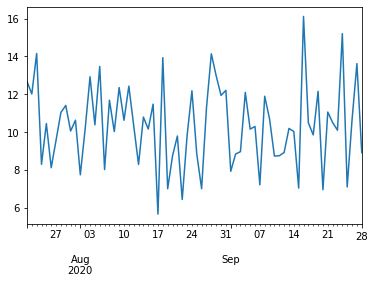

In [64]:
import numpy as np
from datetime import date
hoje = pd.to_datetime(date.today())
indice = pd.date_range(hoje, periods=70)
valores = np.random.normal(10,2,70)
serie = pd.Series(valores, index=indice)
serie.plot()

## Modificação de frequências

In [66]:
# Frequência normal
index = pd.date_range('2020', freq='H',periods=10)
serie = pd.Series(range(len(index)), index=index)
serie

2020-01-01 00:00:00    0
2020-01-01 01:00:00    1
2020-01-01 02:00:00    2
2020-01-01 03:00:00    3
2020-01-01 04:00:00    4
2020-01-01 05:00:00    5
2020-01-01 06:00:00    6
2020-01-01 07:00:00    7
2020-01-01 08:00:00    8
2020-01-01 09:00:00    9
Freq: H, dtype: int64

In [82]:
# Frequência reduzia
serie.resample('2H').mean()

2020-01-01 00:00:00    0.5
2020-01-01 02:00:00    2.5
2020-01-01 04:00:00    4.5
2020-01-01 06:00:00    6.5
2020-01-01 08:00:00    8.5
Freq: 2H, dtype: float64

In [76]:
# Frequência aumentada
#serie.resample('0.5H').mean # Os valores intermediarios serão vazios
serie.resample('0.5H').interpolate() # Os vazios são preenchidos com a media dos vizinhos

2020-01-01 00:00:00    0.0
2020-01-01 00:30:00    0.5
2020-01-01 01:00:00    1.0
2020-01-01 01:30:00    1.5
2020-01-01 02:00:00    2.0
2020-01-01 02:30:00    2.5
2020-01-01 03:00:00    3.0
2020-01-01 03:30:00    3.5
2020-01-01 04:00:00    4.0
2020-01-01 04:30:00    4.5
2020-01-01 05:00:00    5.0
2020-01-01 05:30:00    5.5
2020-01-01 06:00:00    6.0
2020-01-01 06:30:00    6.5
2020-01-01 07:00:00    7.0
2020-01-01 07:30:00    7.5
2020-01-01 08:00:00    8.0
2020-01-01 08:30:00    8.5
2020-01-01 09:00:00    9.0
Freq: 30T, dtype: float64